# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 6

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

#minGames = df['games played'] >= 0

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [32]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(numberToShow))
print('DEFENDERS')
display(df[defenders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,48,5.000000,34,26.738555,6.8,5.347711,5.737227,5.462494,2.440885
325,Darlow,Newcastle Utd,50,6.000000,30,31.355124,5.0,5.225854,5.806010,5.122604,2.337073
252,Alisson,Liverpool,59,3.958333,19,18.250420,4.8,4.610632,5.856272,4.633933,1.898167
431,Fabianski,West Ham,50,6.000000,24,24.683174,4.0,4.113862,4.658692,3.915190,1.839775
217,Schmeichel,Leicester City,55,5.952381,25,25.058701,4.2,4.209862,4.321413,4.035349,1.795091
417,Johnstone,West Brom,45,5.945946,22,21.931433,3.7,3.688468,4.249686,3.770606,1.738761
96,Pope,Burnley,55,5.000000,17,19.525596,3.4,3.905119,4.077948,3.824249,1.665148
213,Meslier,Leeds United,45,6.000000,24,20.909198,4.0,3.484866,4.258440,3.438678,1.642782
157,Pickford,Everton,50,6.071429,17,22.084366,2.8,3.637425,3.617972,3.790262,1.626706


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
470,Kilman,Wolves,41,2.987013,23,18.279943,7.7,6.119807,6.924317,5.941568,3.022357
389,Aurier,Tottenham,52,2.000000,13,12.260557,6.5,6.130278,6.081085,6.363502,2.688305
277,Cancelo,Manchester City,54,2.000000,13,11.105601,6.5,5.552800,6.510460,5.488917,2.389545
435,Cresswell,West Ham,50,5.961538,31,29.433068,5.2,4.937160,5.737230,4.852037,2.207965
558,Coufal,West Ham,45,3.018868,16,13.905930,5.3,4.606339,5.447907,4.489206,2.171449
232,Chilwell,Chelsea,58,3.000000,27,15.500203,9.0,5.166734,6.246921,5.295969,2.145370
442,Masuaku,West Ham,45,5.000000,21,22.304497,4.2,4.460899,4.718003,4.422229,2.102888
461,Saïss,Wolves,53,6.031746,38,26.598432,6.3,4.409740,3.876891,4.230076,1.915469
123,James,Chelsea,50,5.000000,25,21.140461,5.0,4.228092,3.281670,4.327887,1.890860


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
105,Jorginho,Chelsea,53,5.000000,35,31.935023,7.0,6.387005,6.192616,6.611698,2.774337
33,Hourihane,Aston Villa,60,2.000000,17,13.042374,8.5,6.521187,6.849853,6.323062,2.662263
141,Zaha,Crystal Palace,73,6.000000,48,41.147299,8.0,6.857883,7.602818,7.206960,2.538216
390,Son,Tottenham,95,6.000000,69,44.456066,11.5,7.409344,8.198125,7.535635,2.403909
37,Grealish,Aston Villa,73,5.000000,39,31.890194,7.8,6.378039,6.614803,6.093309,2.360618
251,Mané,Liverpool,120,5.000000,39,40.663485,7.8,8.132697,8.850443,7.349625,2.347707
508,Rodríguez,Everton,80,6.029412,41,36.960930,6.8,6.130106,6.746549,6.548498,2.167320
254,Salah,Liverpool,124,6.024096,50,43.345203,8.3,7.195304,5.876306,6.555661,2.043329
450,Fornals,West Ham,64,6.041667,29,30.791424,4.8,5.096512,5.773459,5.457669,2.014573


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
388,Kane,Tottenham,109,6.018519,65,55.768148,10.8,9.266092,10.806123,9.375133,2.806618
202,Bamford,Leeds United,59,5.975610,49,37.737037,8.2,6.315178,6.907368,6.106565,2.599917
506,Wilson,Newcastle Utd,65,6.029412,41,36.877037,6.8,6.116192,6.273869,5.942106,2.398968
68,Maupay,Brighton,66,6.000000,36,36.608519,6.0,6.101420,6.933684,6.047799,2.374974
514,Watkins,Aston Villa,60,5.000000,27,27.568519,5.4,5.513704,5.560165,5.216775,2.250960
377,Adams,Southampton,58,6.041667,29,30.737037,4.8,5.087510,5.297517,5.120331,2.112473
224,Vardy,Leicester City,100,5.000000,41,33.380000,8.2,6.676000,6.075000,7.032116,2.111137
164,Calvert-Lewin,Everton,77,6.027397,44,33.900000,7.3,5.624318,5.760000,6.072184,2.026864
366,Ings,Southampton,85,6.029412,41,33.057037,6.8,5.482631,6.087407,5.511395,1.880527


Below we compile a list sorting players based on a given metric (irrespective of position).

In [7]:
metric = 'adjusted points per game'

display(df.loc[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
251,Mané,Liverpool,120,5.000000,39,40.663485,7.8,8.132697,7.227144,2.347707
390,Son,Tottenham,95,6.000000,69,44.456066,11.5,7.409344,6.741486,2.403909
254,Salah,Liverpool,124,6.024096,50,43.345203,8.3,7.195304,6.452100,2.043329
141,Zaha,Crystal Palace,73,6.000000,48,41.147299,8.0,6.857883,6.280129,2.538216
33,Hourihane,Aston Villa,60,2.000000,17,13.042374,8.5,6.521187,6.228515,2.662263
105,Jorginho,Chelsea,53,5.000000,35,31.935023,7.0,6.387005,5.794371,2.774337
37,Grealish,Aston Villa,73,5.000000,39,31.890194,7.8,6.378039,5.948468,2.360618
302,Fernandes,Manchester Utd,105,5.000000,34,31.610455,6.8,6.322091,6.632042,1.951040
508,Rodríguez,Everton,80,6.029412,41,36.960930,6.8,6.130106,6.355483,2.167320


In [31]:
metric = 'valuePoints metric'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
470,Kilman,Wolves,41,2.987013,7.7,6.119807,6.924317,6.701331,5.941568,3.022357
388,Kane,Tottenham,109,6.018519,10.8,9.266092,10.806123,8.406686,9.375133,2.806618
105,Jorginho,Chelsea,53,5.000000,7.0,6.387005,6.192616,5.794371,6.611698,2.774337
389,Aurier,Tottenham,52,2.000000,6.5,6.130278,6.081085,5.602123,6.363502,2.688305
33,Hourihane,Aston Villa,60,2.000000,8.5,6.521187,6.849853,6.228515,6.323062,2.662263
202,Bamford,Leeds United,59,5.975610,8.2,6.315178,6.907368,5.979051,6.106565,2.599917
141,Zaha,Crystal Palace,73,6.000000,8.0,6.857883,7.602818,6.280129,7.206960,2.538216
12,Martínez,Aston Villa,48,5.000000,6.8,5.347711,5.737227,5.611200,5.462494,2.440885
390,Son,Tottenham,95,6.000000,11.5,7.409344,8.198125,6.741486,7.535635,2.403909


In [10]:
metric = 'form 5'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
388,Kane,Tottenham,109,6.018519,65,55.768148,10.8,9.266092,10.806123,9.375133,2.806618
68,Maupay,Brighton,66,6.000000,36,36.608519,6.0,6.101420,6.933684,6.047799,2.374974
202,Bamford,Leeds United,59,5.975610,49,37.737037,8.2,6.315178,6.907368,6.106565,2.599917
506,Wilson,Newcastle Utd,65,6.029412,41,36.877037,6.8,6.116192,6.273869,5.942106,2.398968
582,Grant,West Brom,60,2.000000,11,9.000000,5.5,4.500000,6.200000,4.651409,1.837117
366,Ings,Southampton,85,6.029412,41,33.057037,6.8,5.482631,6.087407,5.511395,1.880527
224,Vardy,Leicester City,100,5.000000,41,33.380000,8.2,6.676000,6.075000,7.032116,2.111137
164,Calvert-Lewin,Everton,77,6.027397,44,33.900000,7.3,5.624318,5.760000,6.072184,2.026864
514,Watkins,Aston Villa,60,5.000000,27,27.568519,5.4,5.513704,5.560165,5.216775,2.250960


In [9]:
metric = 'next5_xP'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,109,6.018519,65,55.768148,10.8,9.266092,9.375133,2.806618
224,Vardy,Leicester City,100,5.000000,41,33.380000,8.2,6.676000,7.032116,2.111137
202,Bamford,Leeds United,59,5.975610,49,37.737037,8.2,6.315178,6.106565,2.599917
164,Calvert-Lewin,Everton,77,6.027397,44,33.900000,7.3,5.624318,6.072184,2.026864
68,Maupay,Brighton,66,6.000000,36,36.608519,6.0,6.101420,6.047799,2.374974
506,Wilson,Newcastle Utd,65,6.029412,41,36.877037,6.8,6.116192,5.942106,2.398968
166,Richarlison,Everton,78,5.000000,22,26.125556,4.4,5.225111,5.635912,1.870890
366,Ings,Southampton,85,6.029412,41,33.057037,6.8,5.482631,5.511395,1.880527
514,Watkins,Aston Villa,60,5.000000,27,27.568519,5.4,5.513704,5.216775,2.250960


In [13]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [15]:
metric = 'xG+xA'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,109,6.018519,10.8,9.266092,8.406686,2.806618,4.0,3.3,7.3,1.212923
254,Salah,Liverpool,124,6.024096,8.3,7.195304,6.452100,2.043329,4.1,1.8,5.9,0.979400
251,Mané,Liverpool,120,5.000000,7.8,8.132697,7.227144,2.347707,4.1,1.6,5.7,1.140000
68,Maupay,Brighton,66,6.000000,6.0,6.101420,5.721498,2.374974,4.4,0.6,5.0,0.833333
224,Vardy,Leicester City,100,5.000000,8.2,6.676000,7.189752,2.111137,4.5,0.1,4.6,0.920000
141,Zaha,Crystal Palace,73,6.000000,8.0,6.857883,6.280129,2.538216,3.4,1.2,4.6,0.766667
390,Son,Tottenham,95,6.000000,11.5,7.409344,6.741486,2.403909,2.8,1.8,4.6,0.766667
164,Calvert-Lewin,Everton,77,6.027397,7.3,5.624318,5.777729,2.026864,4.4,0.1,4.5,0.746591
202,Bamford,Leeds United,59,5.975610,8.2,6.315178,5.979051,2.599917,3.8,0.4,4.2,0.702857


## Player Visualizations

In [16]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week6,cleansheet_week6,xA,xA_points,xA_week6,assists_week6,adjusted points per game,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,next1_xP,next5_xP,next10_xP,form 5,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
514,1,2,87,NaN,NaN,3,178301,NaN,NaN,0,0,0,0,93.9,49,3,NaN,NaN,1,4,6.2,6.2,2,Ollie,6.2,5,3,43.8,18,9,False,144.8,34,9,450,NaN,NaN,60,0,0,NaN,0,NaN,178301.jpg,5.4,0,0,Watkins,4.8,False,...,3.3,0.0,0.4,1.2,0.1,0.0,5.513704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.1,0.0,0.9,1.0,0.2,0.0,4.0,0.5,0.0,0.7,1.0,0.0,0.0,14.900826,2.3,3.0,1.7,0.0,0.1,1.0,2.4,0.1,0.0,0.6,1.0,0.0,0.0,5.044337,5.216775,5.394604,5.560165,0.918951,2.25096,3.7,0.74


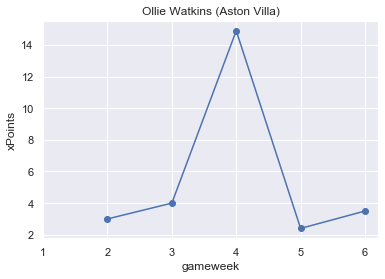

In [38]:
# find player index
name_string = 'Watk'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 506
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [22]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week6,cleansheet_week6,xA,xA_points,xA_week6,assists_week6,adjusted points per game,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,next1_xP,next5_xP,next10_xP,form 5,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,20,100.0,100.0,1,176413,NaN,NaN,0,0,-2,2,14.1,246,142,NaN,NaN,0,3,2.5,2.0,3,Christian,2.0,2,0,11.3,196,94,False,26.4,283,117,173,NaN,2020-09-14T22:30:19.934227Z,83,0,0,NaN,0,NaN,176413.jpg,2.0,0,0,Pulisic,3.9,False,...,0.7,1.0,0.1,0.3,0.0,0.0,2.363597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,2.910803,0.1,0.0,2.2,0.0,0.1,0.0,2.377166,2.407639,2.352619,2.302463,0.284771,0.820417,0.3,0.1


In [24]:
my_starting11 = [363,259,77,239,254,302,119,508,469,506,388]
my_subs = [35,200,146,262]

In [27]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,6.000000,4.0,3.423276,3.926193,2.980288,3.478781,1.613748
259,Alexander-Arnold,Liverpool,74,6.071429,2.8,3.599503,4.107292,3.383464,3.476432,1.323204
77,Lamptey,Brighton,47,6.086957,2.3,3.485018,3.145811,2.796302,3.168939,1.607519
239,Justin,Leicester City,48,6.046512,4.3,3.432501,3.201413,3.014819,3.301136,1.566715
254,Salah,Liverpool,124,6.024096,8.3,7.195304,5.876306,6.452100,6.555661,2.043329
302,Fernandes,Manchester Utd,105,5.000000,6.8,6.322091,6.848678,6.632042,6.112983,1.951040
119,Pulisic,Chelsea,83,3.000000,2.0,2.363597,2.302463,2.377166,2.407639,0.820417
508,Rodríguez,Everton,80,6.029412,6.8,6.130106,6.746549,6.355483,6.548498,2.167320
469,Podence,Wolves,55,5.000000,4.0,3.834777,4.018559,4.182199,3.761052,1.635154



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN
200,Dallas,Leeds United,45,5.9375,3.2,3.221845,3.878440,3.149626,3.110327,1.518792
146,Mitchell,Crystal Palace,42,6.0000,2.5,2.520607,2.610141,3.030438,2.924992,1.229930
262,Brewster,Sheffield Utd,45,2.0000,1.0,1.000000,1.000000,1.000000,1.000000,0.471405


## Save data

In [30]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)